In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.inspection import PartialDependenceDisplay,permutation_importance
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.preprocessing import MinMaxScaler
import shap
import lime
import lime.lime_tabular
from tensorflow.keras.models import Model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from interpret.glassbox import ExplainableBoostingRegressor
from interpret import show
import time
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the California dataset
california = fetch_california_housing()
X = pd.DataFrame(california.data, columns=california.feature_names)
y = pd.Series(california.target)

In [3]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Define the models
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

In [5]:
# Train the models
rf_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [6]:
# Evaluate the models
rf_pred = rf_model.predict(X_test)
gb_pred = gb_model.predict(X_test)

# Deep Learning Model
mlp_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])

mlp_model.compile(optimizer='adam', loss='mse')
mlp_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

# Evaluate the deep learning model
dl_pred = mlp_model.predict(X_test).flatten()

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


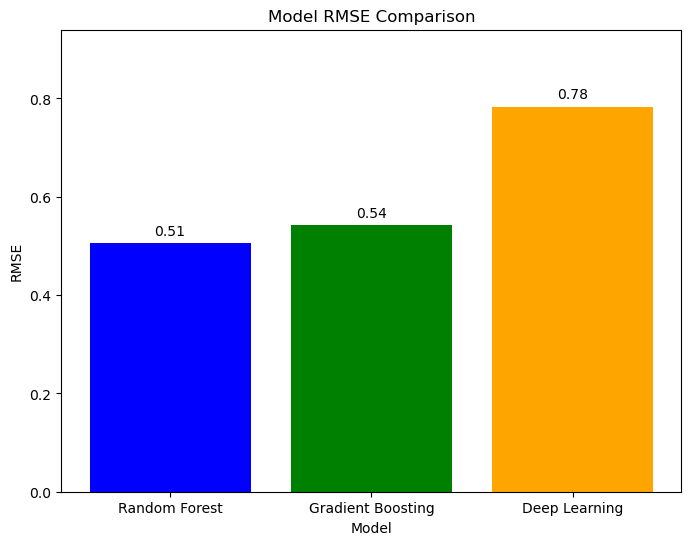

In [7]:
# Compute RMSE values for each model
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
gb_rmse = np.sqrt(mean_squared_error(y_test, gb_pred))
dl_rmse = np.sqrt(mean_squared_error(y_test, dl_pred))

# Define model names and their corresponding RMSEs
models = ["Random Forest", "Gradient Boosting", "Deep Learning"]
rmses = [rf_rmse, gb_rmse, dl_rmse]

# Create a bar plot
plt.figure(figsize=(8, 6))
bars = plt.bar(models, rmses, color=["blue", "green", "orange"])

# Add text labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f"{yval:.2f}", ha='center', va='bottom')

plt.title("Model RMSE Comparison")
plt.xlabel("Model")
plt.ylabel("RMSE")
plt.ylim(0, max(rmses) * 1.2)
plt.show()

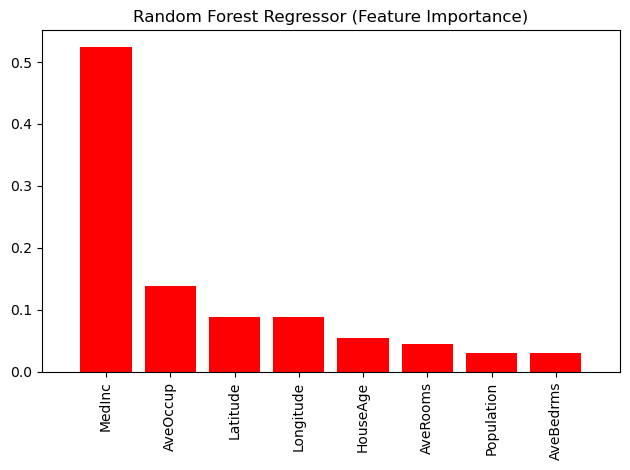

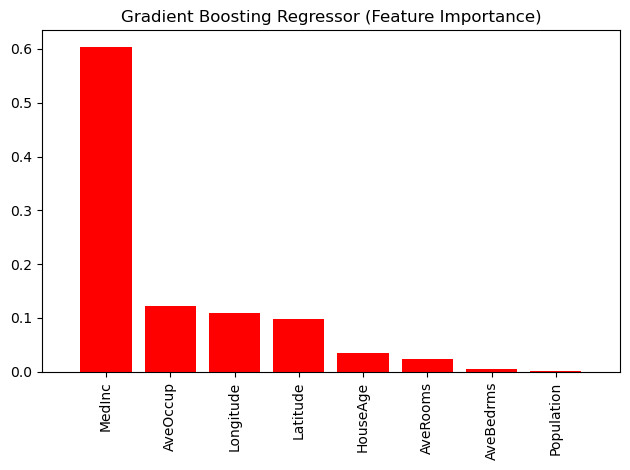

In [8]:
def plot_feature_importance(model, feature_names, plot_title="Feature Importances"):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    plt.figure()
    plt.title(plot_title)
    plt.bar(range(len(feature_names)), importances[indices], color="r", align="center")
    plt.xticks(range(len(feature_names)), np.array(feature_names)[indices], rotation=90)
    plt.xlim([-1, len(feature_names)])
    plt.tight_layout()  # Ensures labels are fully visible
    plt.show()

# Call the function with distinct titles
plot_feature_importance(rf_model, california.feature_names, 
                        plot_title="Random Forest Regressor (Feature Importance)")
plot_feature_importance(gb_model, california.feature_names, 
                        plot_title="Gradient Boosting Regressor (Feature Importance)")


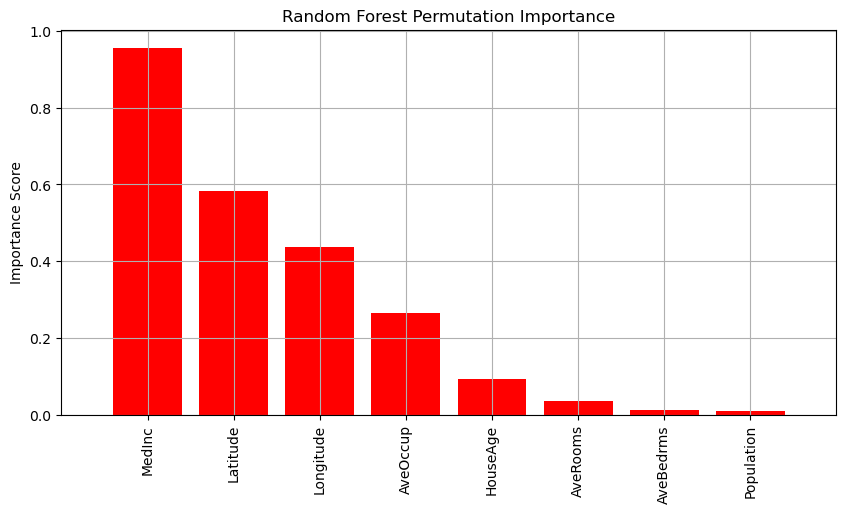

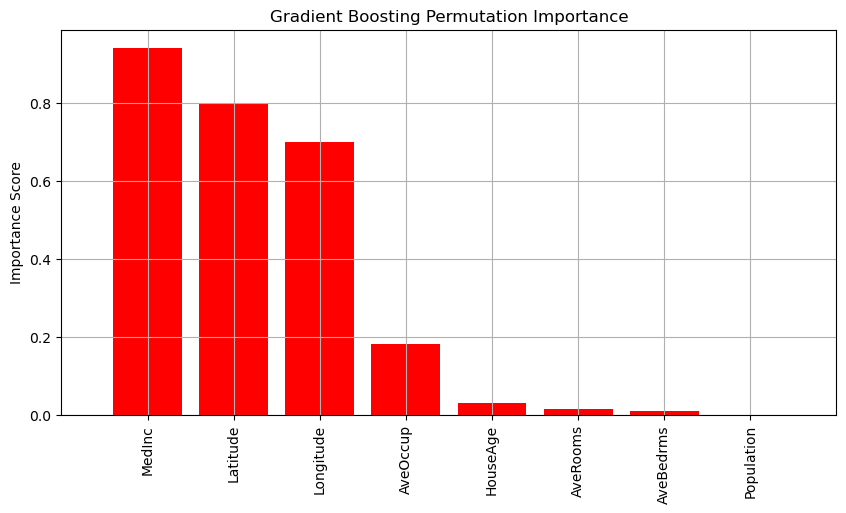

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━

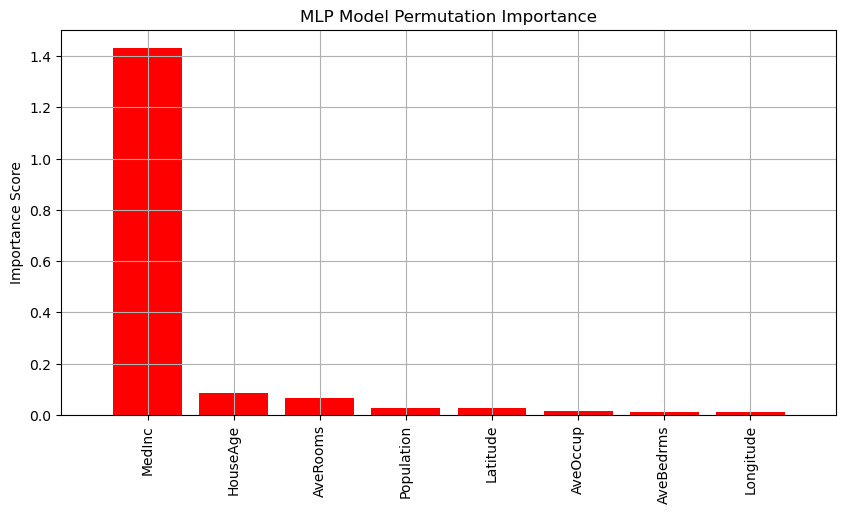

In [9]:
# Function to plot feature importance
def plot_feature_importance(model, X, y, feature_names, title="Permutation Importances"):
    result = permutation_importance(model, X, y, n_repeats=10, random_state=42, scoring='neg_mean_squared_error')
    importances = result.importances_mean

    indices = np.argsort(importances)[::-1]

    plt.figure(figsize=(10, 5))
    plt.title(title)
    plt.bar(range(len(feature_names)), importances[indices], color="r", align="center")
    plt.xticks(range(len(feature_names)), np.array(feature_names)[indices], rotation=90)
    plt.xlim([-1, len(feature_names)])
    plt.ylabel("Importance Score")
    plt.grid()
    plt.show()

# Plot feature importance for RandomForestRegressor
plot_feature_importance(rf_model, X_test, y_test, california.feature_names, title="Random Forest Permutation Importance")

# Plot feature importance for GradientBoostingRegressor
plot_feature_importance(gb_model, X_test, y_test, california.feature_names, title="Gradient Boosting Permutation Importance")

# Wrapper for Keras model to make it Scikit-Learn compatible
class KerasRegressorWrapper(BaseEstimator, RegressorMixin):
    def __init__(self, model):
        self.model = model

    def fit(self, X, y=None):
        pass  # Already trained

    def predict(self, X):
        return self.model.predict(X).flatten()  # Ensure correct shape for sklearn functions

# Convert Keras model to scikit-learn compatible estimator
mlp_sklearn = KerasRegressorWrapper(mlp_model)

# Function to plot feature importance using permutation importance
def plot_feature_importance(model, X, y, feature_names, title="Feature Importances"):
    result = permutation_importance(model, X, y, n_repeats=10, random_state=42, scoring='neg_mean_squared_error')
    importances = result.importances_mean

    indices = np.argsort(importances)[::-1]

    plt.figure(figsize=(10, 5))
    plt.title(title)
    plt.bar(range(len(feature_names)), importances[indices], color="r", align="center")
    plt.xticks(range(len(feature_names)), np.array(feature_names)[indices], rotation=90)
    plt.xlim([-1, len(feature_names)])
    plt.ylabel("Importance Score")
    plt.grid()
    plt.show()

# Plot feature importance for MLP model using the wrapped model
plot_feature_importance(mlp_sklearn, X_test, y_test, california.feature_names, title="MLP Model Permutation Importance")

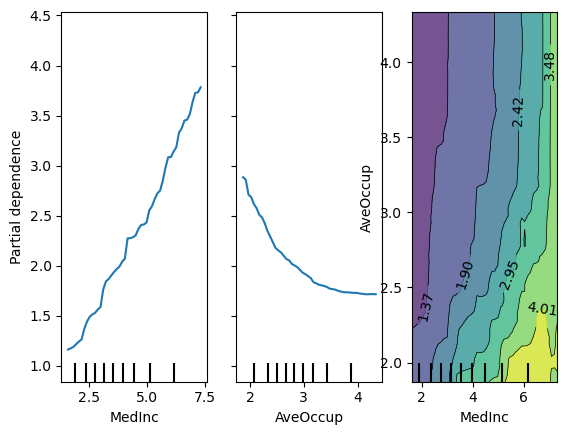

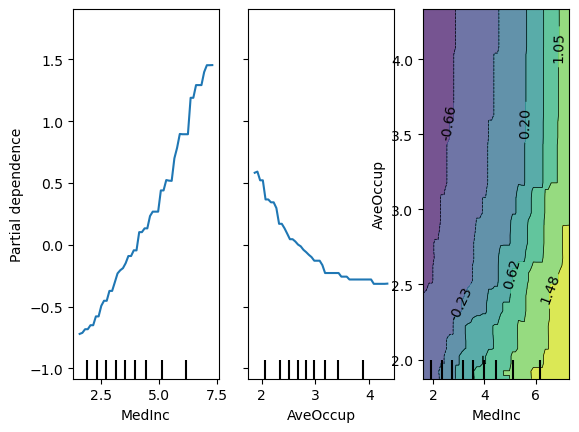

516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
516/516 ━━━━━━━━

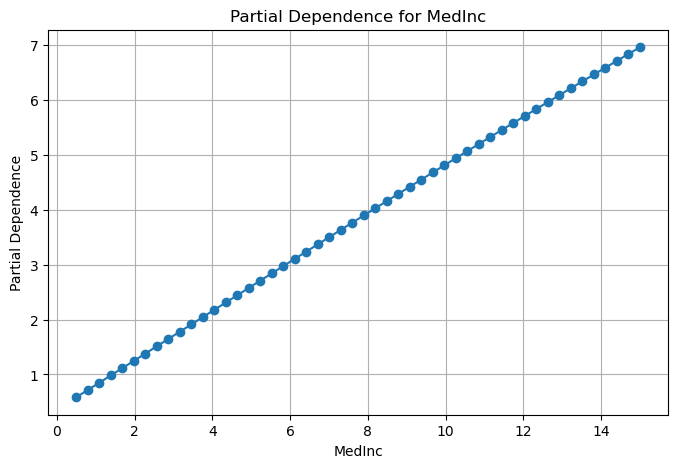

516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
516/516 ━━━━━━━━

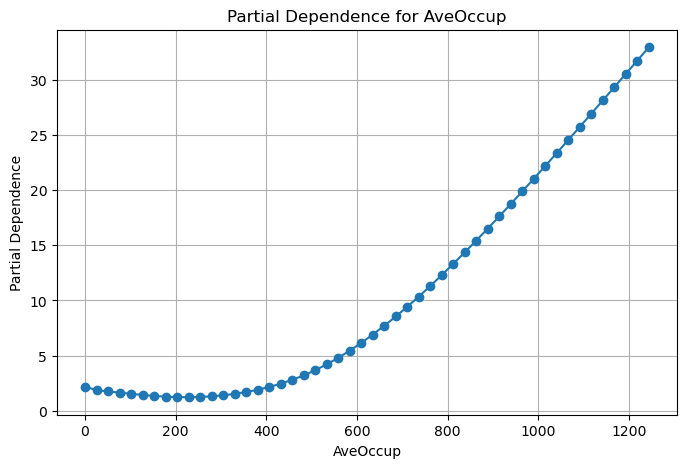

In [10]:
# Define the features to analyze
features = [0, 5, (0, 5)]

# Partial Dependence Plot for RandomForestRegressor
PartialDependenceDisplay.from_estimator(rf_model, X_train, features, feature_names=california.feature_names, grid_resolution=50)
plt.show()

# Partial Dependence Plot for GradientBoostingRegressor
PartialDependenceDisplay.from_estimator(gb_model, X_train, features, feature_names=california.feature_names, grid_resolution=50)
plt.show()


# Define a function to compute partial dependence manually for deep learning models
def compute_partial_dependence_dl(model, X, feature_idx, grid_resolution=50):
    X_copy = X.copy()
    feature_values = np.linspace(X_copy.iloc[:, feature_idx].min(), X_copy.iloc[:, feature_idx].max(), grid_resolution)
    pdp_values = []
    
    for val in feature_values:
        X_copy.iloc[:, feature_idx] = val  # Vary only the selected feature
        predictions = mlp_model.predict(X_copy).flatten()
        pdp_values.append(np.mean(predictions))  # Take the mean prediction

    return feature_values, pdp_values

# Compute partial dependence for selected features
features = [0, 5]  # Index of features to analyze

for feature_idx in features:
    x_vals, pdp_vals = compute_partial_dependence_dl(mlp_model, X_train, feature_idx)
    
    # Plot results
    plt.figure(figsize=(8, 5))
    plt.plot(x_vals, pdp_vals, marker='o', linestyle='-')
    plt.xlabel(california.feature_names[feature_idx])
    plt.ylabel('Partial Dependence')
    plt.title(f'Partial Dependence for {california.feature_names[feature_idx]}')
    plt.grid()
    plt.show()


In [11]:
# Create LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    X_train.values, 
    feature_names=california.feature_names, 
    mode="regression"
)

# Define a function to explain instance
def explain_instance(model, instance):
    exp = explainer.explain_instance(instance.values, model.predict, num_features=10)
    exp.show_in_notebook(show_table=True)

# Explain an instance using RandomForestRegressor
explain_instance(rf_model, X_test.iloc[50])

# Explain an instance using GradientBoostingRegressor
explain_instance(gb_model, X_test.iloc[50])

explain_instance(mlp_model, X_test.iloc[50])

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step



 Computing SHAP values for RandomForestRegressor...


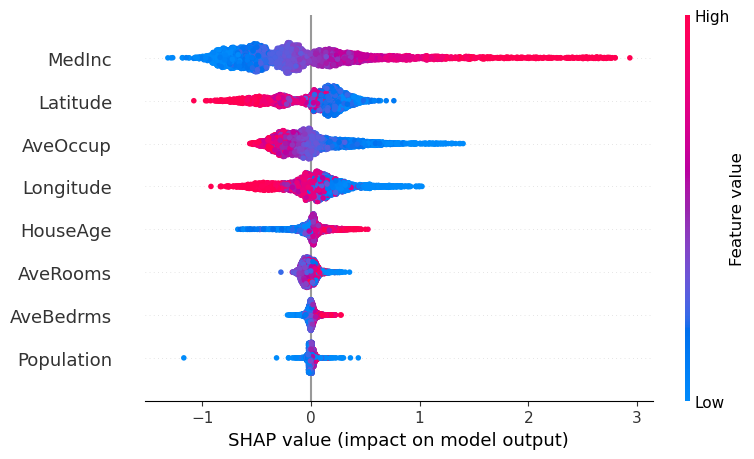


 Computing SHAP values for GradientBoostingRegressor...


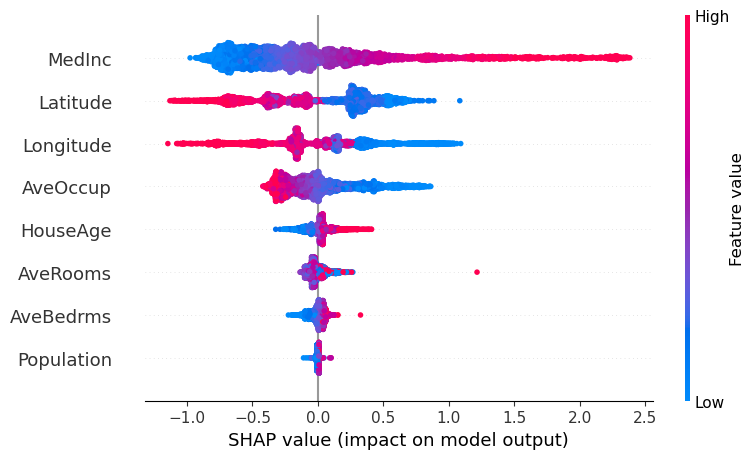


 Computing SHAP values for MLP Model (MLP)...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


  0%|          | 0/10 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
SHAP values shape for MLP: (10, 8)
Sample test shape: (10, 8)
Feature names length: 8


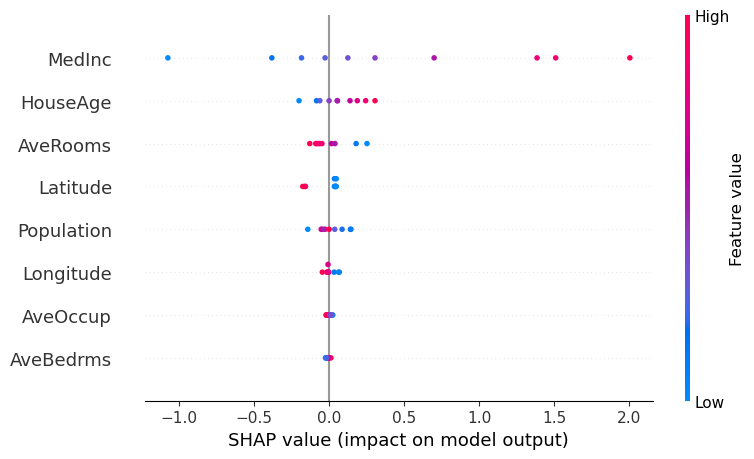

Total Execution Time: 24.06 minutes


In [12]:
### SHAP

# Measure execution time
start_time = time.time()

### SHAP for RandomForestRegressor ###
print("\n Computing SHAP values for RandomForestRegressor...")
explainer_rf = shap.TreeExplainer(rf_model)
shap_values_rf = explainer_rf.shap_values(X_test)  
shap.summary_plot(shap_values_rf, X_test, feature_names=california.feature_names)

### SHAP for GradientBoostingRegressor ###
print("\n Computing SHAP values for GradientBoostingRegressor...")
explainer_gb = shap.TreeExplainer(gb_model)
shap_values_gb = explainer_gb.shap_values(X_test)  
shap.summary_plot(shap_values_gb, X_test, feature_names=california.feature_names)

### SHAP for MLP Model (Deep Learning) ###
print("\n Computing SHAP values for MLP Model (MLP)...")

# Use a lambda to flatten predictions
predict_fn = lambda x: mlp_model.predict(x).flatten()

# Use a small sample from training for background and test for explanation
background = shap.sample(X_train, 10)
sample_test = shap.sample(X_test, 10)

# Initialize KernelExplainer with the flattened prediction function
explainer_mlp = shap.KernelExplainer(predict_fn, background)
shap_values_mlp = explainer_mlp.shap_values(sample_test)

# Convert to NumPy array (should be (n_samples, n_features))
shap_values_mlp = np.array(shap_values_mlp)

# Check the shapes for debugging
print(f"SHAP values shape for MLP: {shap_values_mlp.shape}")
print(f"Sample test shape: {sample_test.shape}")
print(f"Feature names length: {len(california.feature_names)}")

# Now create the summary plot
shap.summary_plot(shap_values_mlp, sample_test, feature_names=california.feature_names)

# Total Execution Time
end_time = time.time()
execution_time_minutes = (end_time - start_time) / 60
print(f"Total Execution Time: {execution_time_minutes:.2f} minutes")


SHAP Dependence & Force Plots for RandomForestRegressor...


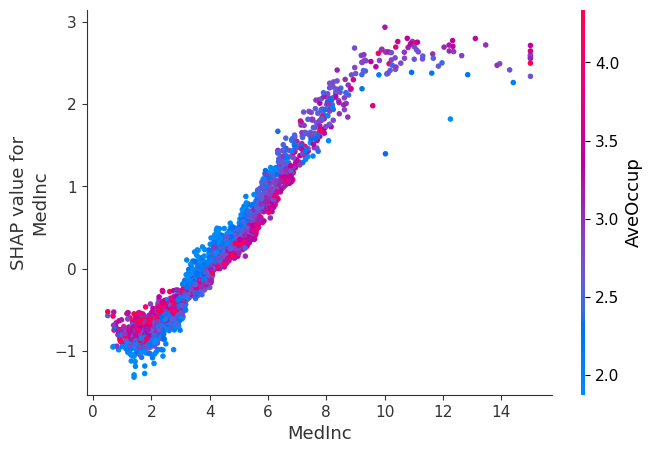


SHAP Dependence & Force Plots for GradientBoostingRegressor...


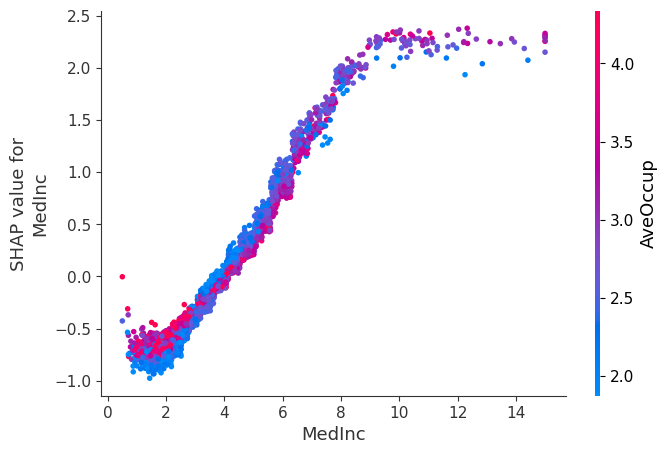


SHAP Dependence & Force Plots for MLP Model...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


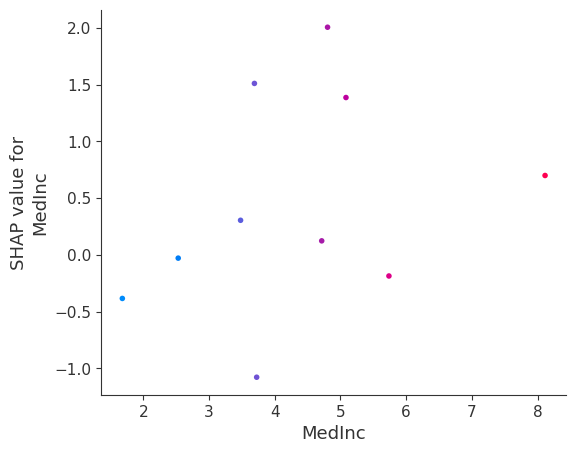

Total Execution Time: 0.02 minutes


In [13]:
# Measure execution time
start_time = time.time()

# Select a feature name from the California dataset for SHAP analysis
selected_feature = "MedInc"  # Example feature (Median Income), adjust as needed

# Initialize JavaScript visualization for interactive plots
shap.initjs()

### SHAP Dependence & Force Plots for RandomForestRegressor ###
print("\nSHAP Dependence & Force Plots for RandomForestRegressor...")

# Initialize the explainer again.
explainer_rf = shap.TreeExplainer(rf_model)

# Create dependence plot for the selected feature using the saved SHAP values.
shap.dependence_plot(selected_feature, shap_values_rf, X_test)

# For the force plot, obtain the expected value.
expected_value_rf = explainer_rf.expected_value
if isinstance(expected_value_rf, np.ndarray):
    expected_value_rf = expected_value_rf[0]
# Display a force plot for one example (instance at index 5).
shap.force_plot(expected_value_rf, shap_values_rf[5, :], X_test.iloc[5, :])

### SHAP Dependence & Force Plots for GradientBoostingRegressor ###
print("\nSHAP Dependence & Force Plots for GradientBoostingRegressor...")

# Shap_values_gb is available from the previous computation
explainer_gb = shap.TreeExplainer(gb_model)

shap.dependence_plot(selected_feature, shap_values_gb, X_test)

expected_value_gb = explainer_gb.expected_value
if isinstance(expected_value_gb, np.ndarray):
    expected_value_gb = expected_value_gb[0]
shap.force_plot(expected_value_gb, shap_values_gb[5, :], X_test.iloc[5, :])

### SHAP Dependence & Force Plots for MLP Model (Deep Learning) ###
print("\nSHAP Dependence & Force Plots for MLP Model...")


# Sample_test corresponds to the same subset used previously.
sample_test = X_test[:10] 
# The explainer for the MLP model may be re-initialized to obtain the expected value.
explainer_mlp = shap.KernelExplainer(mlp_model.predict, sample_test)

shap.dependence_plot(selected_feature, shap_values_mlp, sample_test)

expected_value_mlp = explainer_mlp.expected_value
if isinstance(expected_value_mlp, np.ndarray):
    expected_value_mlp = expected_value_mlp[0]
shap.force_plot(expected_value_mlp, shap_values_mlp[5, :], sample_test.iloc[5, :])

# Total Execution Time
end_time = time.time()
execution_time_minutes = (end_time - start_time) / 60
print(f"Total Execution Time: {execution_time_minutes:.2f} minutes")


Generating Local Explanations using SHAP...

Local SHAP Explanation for RandomForestRegressor...


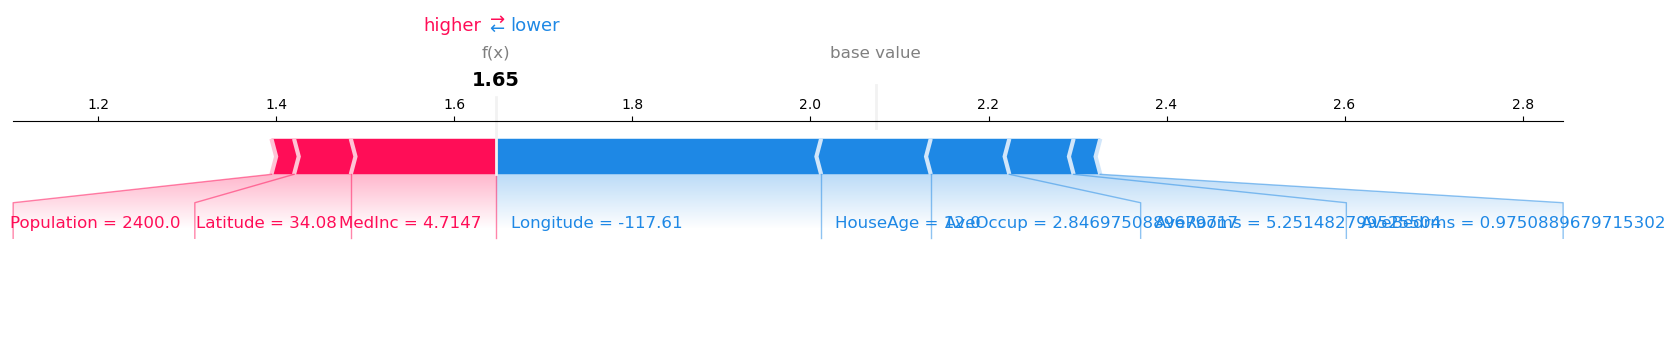

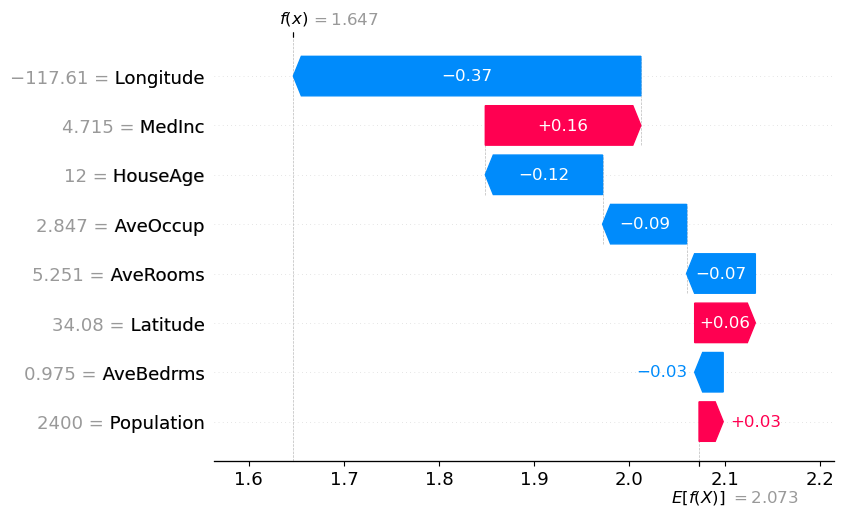

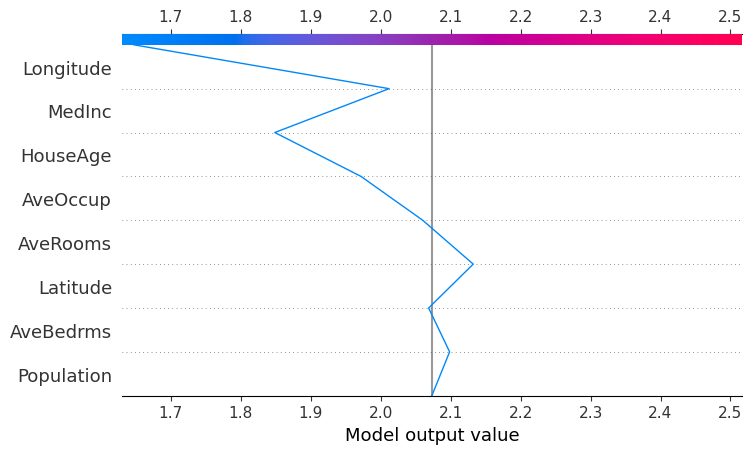


Local SHAP Explanation for GradientBoostingRegressor...


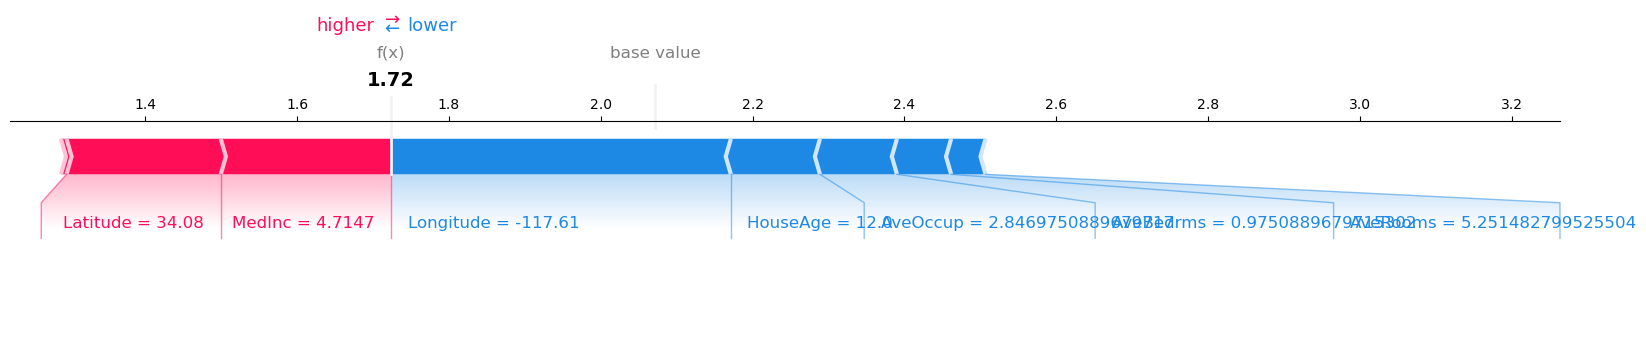

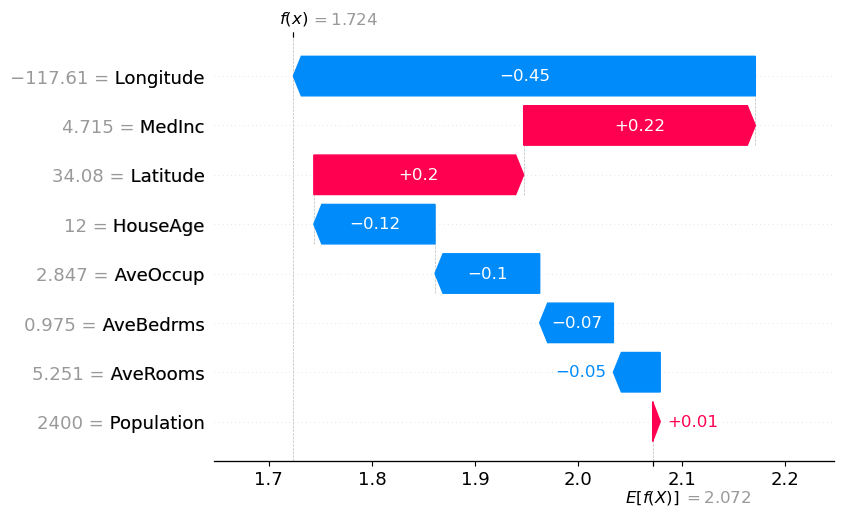

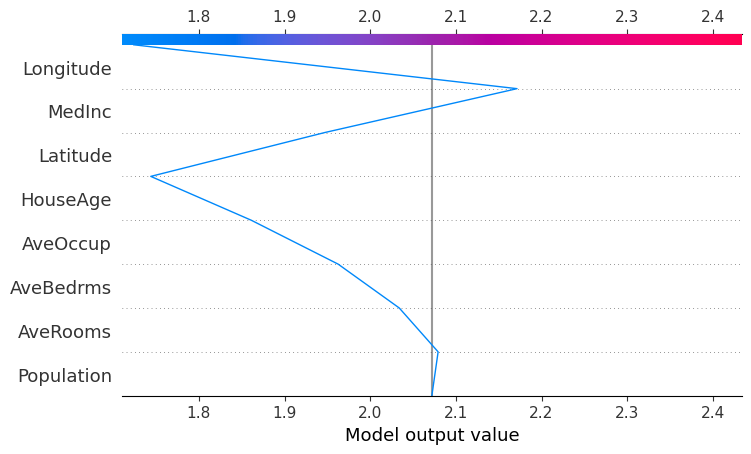


Local SHAP Explanation for MLP Model...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


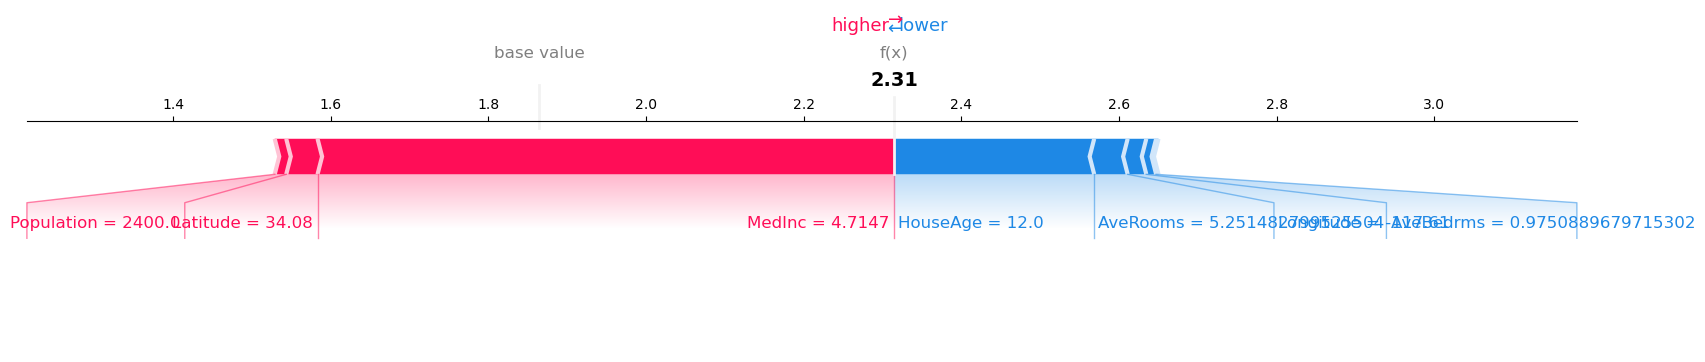

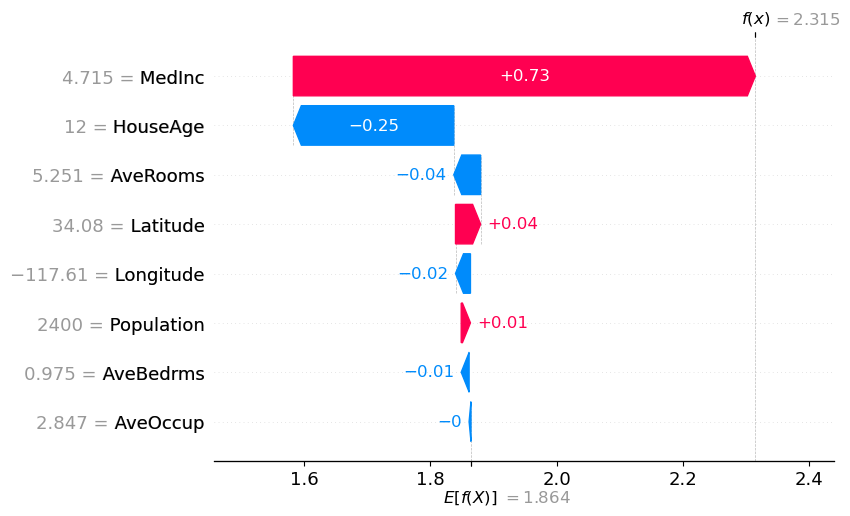

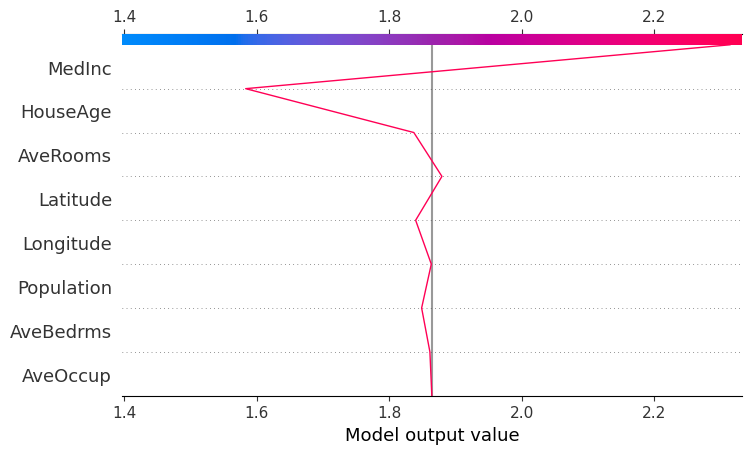


SHAP Local Explanations Completed!


In [14]:
# Select a single instance to explain
index_to_explain = 5  # Change this index as needed

print("\nGenerating Local Explanations using SHAP...")

# SHAP Local Explanation for RandomForestRegressor 

print("\nLocal SHAP Explanation for RandomForestRegressor...")
# Reuse precomputed SHAP values from global explanation
shap_values_rf_local = shap_values_rf  # Already computed in Global SHAP

# Force Plot (Local Explanation)
shap.force_plot(
    explainer_rf.expected_value,
    shap_values_rf_local[index_to_explain, :],  # Reusing global SHAP values
    X_test.iloc[index_to_explain, :],
    matplotlib=True
)

# Waterfall Plot (Local Explanation)
shap.waterfall_plot(shap.Explanation(
    values=shap_values_rf_local[index_to_explain], 
    base_values=explainer_rf.expected_value, 
    data=X_test.iloc[index_to_explain, :]
))

# Decision Plot (Path of Prediction)
shap.decision_plot(
    explainer_rf.expected_value,
    shap_values_rf_local[index_to_explain, :],
    X_test.columns
)

# SHAP Local Explanation for GradientBoostingRegressor 

print("\nLocal SHAP Explanation for GradientBoostingRegressor...")
# Reuse precomputed SHAP values from global explanation
shap_values_gb_local = shap_values_gb  # Already computed in Global SHAP

# Force Plot
shap.force_plot(
    explainer_gb.expected_value,
    shap_values_gb_local[index_to_explain, :],  # Reusing global SHAP values
    X_test.iloc[index_to_explain, :],
    matplotlib=True
)

# Waterfall Plot
shap.waterfall_plot(shap.Explanation(
    values=shap_values_gb_local[index_to_explain], 
    base_values=explainer_gb.expected_value, 
    data=X_test.iloc[index_to_explain, :]
))

# Decision Plot
shap.decision_plot(
    explainer_gb.expected_value,
    shap_values_gb_local[index_to_explain, :],
    X_test.columns
)

#  SHAP Local Explanation for MLP Model (Deep Learning) 

print("\nLocal SHAP Explanation for MLP Model...")

# Since KernelExplainer relies on sampling, we need to recompute SHAP values for this instance
background = shap.sample(X_train, 10)  # Using the same background from Global SHAP
explainer_mlp = shap.KernelExplainer(mlp_model.predict, background)

# Compute SHAP values for only the selected instance
shap_values_mlp_local = explainer_mlp.shap_values(X_test.iloc[[index_to_explain]])

# Convert to NumPy array
shap_values_mlp_local = np.array(shap_values_mlp_local).reshape(1, -1)

# Force Plot
shap.force_plot(
    explainer_mlp.expected_value,
    shap_values_mlp_local[0],
    X_test.iloc[index_to_explain, :],
    matplotlib=True
)

# Waterfall Plot
shap.waterfall_plot(shap.Explanation(
    values=shap_values_mlp_local[0], 
    base_values=explainer_mlp.expected_value, 
    data=X_test.iloc[index_to_explain, :]
))

# Decision Plot
shap.decision_plot(
    explainer_mlp.expected_value,
    shap_values_mlp_local[0],
    X_test.columns
)

print("\nSHAP Local Explanations Completed!")
